In [1]:
import json
import pickle
import os
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Импортируем классы с данными

In [2]:
from classes_for_project import Channel
from classes_for_project import Video

In [3]:
def fix_date(date):
    try:
        months = {'янв.' : '01', 
                  'февр.' : '02',
                  'мар.' : '03',
                  'апр.' : '04',
                  'мая' : '05',
                  'июн.' : '06',
                  'июл.' : '07',
                  'авг.' : '08',
                  'сент.' : '09',
                  'окт.' : '10',
                  'нояб.' : '11',
                  'дек.' : '12'}  
        date = date.split()[-4:]
        date[0] = date[0][1:]
        if date[1] in months:
            date[1] = months[date[1]]
        else:
            date[1] = 'иное'
        date = datetime.datetime(int(date[2]), int(date[1]), int(date[0]))
        date = date.date()
        if date < datetime.datetime(2017, 12, 31).date():
            date = ['старое', 'старое', 'старое']
    except:
        date = ['иное', 'иное', 'иное']
    return date

In [4]:
def month(date):
    try:
        return date.replace(day=1)
    except:
        return date[2]

In [5]:
def week(date):
    try:
        date = date.isocalendar()[:2] 
    except:
        date = date[2]
    return date

In [6]:
def v_int(string):
    try:
        string = ''.join(string.split())
        string = int(string)
    except:
        return 0
    return string

Неожиданно оказалось, что меня интерусует eщё один профессор

In [7]:
def add_another_lector(function):
    def wrapper(video):
        text = video.description.lower() + video.name.lower()
        if 'красносельск' in text:
            video.pirkovskii = True
        else:
            function(video)
    return wrapper

In [8]:
Video.pirkovskii_here = add_another_lector(Video.pirkovskii_here)

Открываем файлы каналов

In [9]:
folder = r'C:\Users\Иннокентий\Documents\Ютуб\каналы2'

In [10]:
filenames = os.listdir(path=folder)
print('В папке ' + str(len(filenames)) + ' канала(ов)')

В папке 2 канала(ов)


In [11]:
channels = {'name' : [], 'category' : [], 'subscribers' : [], 'professors_here' : []}
videos = {'name' : [], 'channel' : [], 'views' : [], 'professors_here' : [], 'date' : []}
channels_and_brands = []
i = 0
number_one_flag = True
for filename in filenames:
    try:
        filename =  folder + '\\' + filename 
        with open(filename, 'rb') as f:
            channel = pickle.load(f)
        channels['name'].append(channel.name)
        channels['category'].append(channel.category)
        channels['subscribers'].append(channel.subscribers.split('подписч')[0])
        for video in channel.videos:
            videos['name'].append(video.name)
            videos['channel'].append(video.channel_name)
            videos['views'].append(video.views.split('просмотр')[0])
            video.pirkovskii_here()
            videos['professors_here'].append(video.pirkovskii)
            videos['date'].append(video.date)
        channel.pirkovskii_here()
        channels['professors_here'].append(channel.pirkovskii)
        print(channel.name, channel.pirkovskii)
    except Exception as error:
        print('Ошибка:', error)
        i += 1
        print(i)

hopehill2000 0.0
Mathematics at HSE 0.1


Запихиваем в датафреймы и записываем в эксель

In [12]:
df_channels = pd.DataFrame(channels)
df_channels.drop_duplicates(inplace=True)

In [13]:
df_channels

,name,category,subscribers,professors_here
0,hopehill2000,other,1,0.0
1,Mathematics at HSE,math,"3,15 тыс.",0.1


In [14]:
df_channels.to_excel('youtube_channels_project.xlsx', index=False)

In [15]:
df_videos = pd.DataFrame(videos)
df_videos['views'] = df_videos['views'].apply(lambda x: v_int(x))

In [16]:
df_videos

,name,channel,views,professors_here,date
0,Total Theatre project- IB Theatre,hopehill2000,1405,False,•25 нояб. 2014 г.
1,Diigo for IB Theatre,hopehill2000,22,False,•28 сент. 2013 г.
2,Cesar's Art,hopehill2000,6,False,•17 янв. 2013 г.
3,"Вологодский В.А. НИС ""Гипотезы Вейля"" 31.03.20...",Mathematics at HSE,37,False,•31 мар. 2021 г.
4,Boris Bilich. Noncommutative analytic geometry...,Mathematics at HSE,81,False,•31 мар. 2021 г.
...,...,...,...,...,...
88,"Финкельберг М.В. Invariant Theory, Spring. 11....",Mathematics at HSE,58,False,•11 мар. 2021 г.
89,Семинар Инварианты Васильева 11.03.21,Mathematics at HSE,44,False,•Прямой эфир состоялся 11 мар. 2021 г.
90,Levin A.M. Elementary Introduction to the Theo...,Mathematics at HSE,69,False,•10 мар. 2021 г.
91,Красносельский А.М. Матанализ. 1 курс. 10.03.2021,Mathematics at HSE,148,True,•10 мар. 2021 г.


In [17]:
df_videos['date'] = df_videos['date'].apply(fix_date)
df_videos['month'] = df_videos['date'].apply(month)
df_videos['week'] = df_videos['date'].apply(week)

In [18]:
df_videos

,name,channel,views,professors_here,date,month,week
0,Total Theatre project- IB Theatre,hopehill2000,1405,False,"[старое, старое, старое]",старое,старое
1,Diigo for IB Theatre,hopehill2000,22,False,"[старое, старое, старое]",старое,старое
2,Cesar's Art,hopehill2000,6,False,"[старое, старое, старое]",старое,старое
3,"Вологодский В.А. НИС ""Гипотезы Вейля"" 31.03.20...",Mathematics at HSE,37,False,2021-03-31,2021-03-01,"(2021, 13)"
4,Boris Bilich. Noncommutative analytic geometry...,Mathematics at HSE,81,False,2021-03-31,2021-03-01,"(2021, 13)"
...,...,...,...,...,...,...,...
88,"Финкельберг М.В. Invariant Theory, Spring. 11....",Mathematics at HSE,58,False,2021-03-11,2021-03-01,"(2021, 10)"
89,Семинар Инварианты Васильева 11.03.21,Mathematics at HSE,44,False,2021-03-01,2021-03-01,"(2021, 9)"
90,Levin A.M. Elementary Introduction to the Theo...,Mathematics at HSE,69,False,2021-03-10,2021-03-01,"(2021, 10)"
91,Красносельский А.М. Матанализ. 1 курс. 10.03.2021,Mathematics at HSE,148,True,2021-03-10,2021-03-01,"(2021, 10)"


In [19]:
df_videos[df_videos['professors_here']]

,name,channel,views,professors_here,date,month,week
10,Пирковский А.Ю. Функциональный анализ-2. 30.03...,Mathematics at HSE,41,True,2021-03-30,2021-03-01,"(2021, 13)"
22,A. Yu. Pirkovskii. C*-algebras and compact qua...,Mathematics at HSE,32,True,2021-03-25,2021-03-01,"(2021, 12)"
34,Пирковский А.Ю. Functional Analysis 2 (Operato...,Mathematics at HSE,59,True,2021-03-23,2021-03-01,"(2021, 12)"
37,Красносносельский А.М. Мат. анализ. 22.03.2021...,Mathematics at HSE,109,True,2021-03-22,2021-03-01,"(2021, 12)"
49,A. Yu. Pirkovskii. C*-algebras and compact qua...,Mathematics at HSE,28,True,2021-03-19,2021-03-01,"(2021, 11)"
65,Красносельский А.М. Матанализ. 1 курс. 17.03.2021,Mathematics at HSE,86,True,2021-03-17,2021-03-01,"(2021, 11)"
74,Красносельский А.М. Матанализ. 15.03.2021 ауд....,Mathematics at HSE,94,True,2021-03-15,2021-03-01,"(2021, 11)"
86,A. Yu. Pirkovskii. C*-algebras and compact qua...,Mathematics at HSE,42,True,2021-03-11,2021-03-01,"(2021, 10)"
91,Красносельский А.М. Матанализ. 1 курс. 10.03.2021,Mathematics at HSE,148,True,2021-03-10,2021-03-01,"(2021, 10)"


In [20]:
df_videos.to_excel('youtube_videos_project.xlsx', index=False)

Рисуем графики

In [21]:
def make_plot(df=df_videos, interval='month', column='professors_here', channel='Все каналы'):
    
    if channel != 'Все каналы':
        df = df[df['channel'] == channel]
    all_ = df.groupby([interval]).count()
    df_prof = df[df[column]]
    df_prof = df_prof.groupby([interval]).count()
    merged = all_.merge(df_prof, how='outer', left_on=interval, right_on = interval)
    merged = merged.fillna(0)
    plt.figure(figsize=(10, 5), dpi=100)
    plt.style.use('ggplot')
    index = []
    for i in merged.index:
        if interval == 'month':
            index.append(str(i)[2:7])
        if interval == 'week':
            index.append(str(i[0])[2:] + str(i[1]))
            
    plt.plot(index, merged['name_y'], label = 'professors')
    plt.plot(index, merged['name_x'], label = 'all')
    plt.xlabel(interval)
    plt.ylabel('Видео')
    plt.title(channel + '   ' + column)
    plt.legend(loc = 'best')
    plt.show()

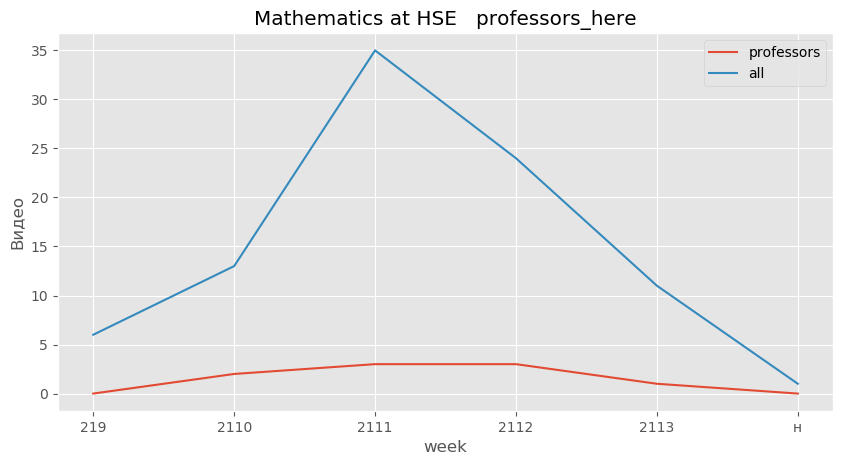

In [22]:
make_plot(interval='week', channel='Mathematics at HSE')

In [23]:
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def make_plot_beau(df=df_videos, interval='month', column='professors_here', channel=None):
    
    if channel != 'Все каналы':
        df = df[df['channel'] == channel]
    all_ = df.groupby([interval]).count()
    df_brand = df[df[column]]
    df_brand = df_brand.groupby([interval]).count()
    merged = all_.merge(df_brand, how='outer', left_on=interval, right_on = interval)
    merged = merged.fillna(0)
  
    labels = merged.index
    all_videos = merged['name_x']
    ads_videos = merged['name_y'].apply(lambda x: int(x))

    x = np.arange(len(labels)) 
    width = 0.35  

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, all_videos, width, label='Все видео')
    rects2 = ax.bar(x + width/2, ads_videos, width, label=column)

    ax.set_ylabel('Видео')
    ax.set_xlabel(interval)
    ax.set_title(column + ' ' + channel)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    autolabel(rects1, ax)
    autolabel(rects2, ax)
    
    plt.style.use('ggplot')

    fig.tight_layout()
    plt.show()

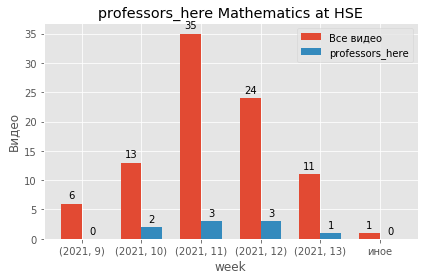

In [24]:
make_plot_beau(interval='week', channel='Mathematics at HSE')